# Importing all the Libraries

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import kruskal



# LOADING THE DATA

In [44]:
df= pd.read_csv(r"/kaggle/input/banking-dataset/bank_data.csv")
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [45]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [47]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [48]:
df.shape

(1882, 6)

In [49]:
df['age'].value_counts()

age
33    82
31    68
29    68
35    67
34    62
      ..
80     5
83     5
73     4
81     4
79     1
Name: count, Length: 67, dtype: int64

# Graphical exploratory data analysis

**TRYING TO UNDERSTAND THE CORRELATION BETWEEN AGE AND EXPECTED RECOVERY AMOUNT in (0-2000)Range**

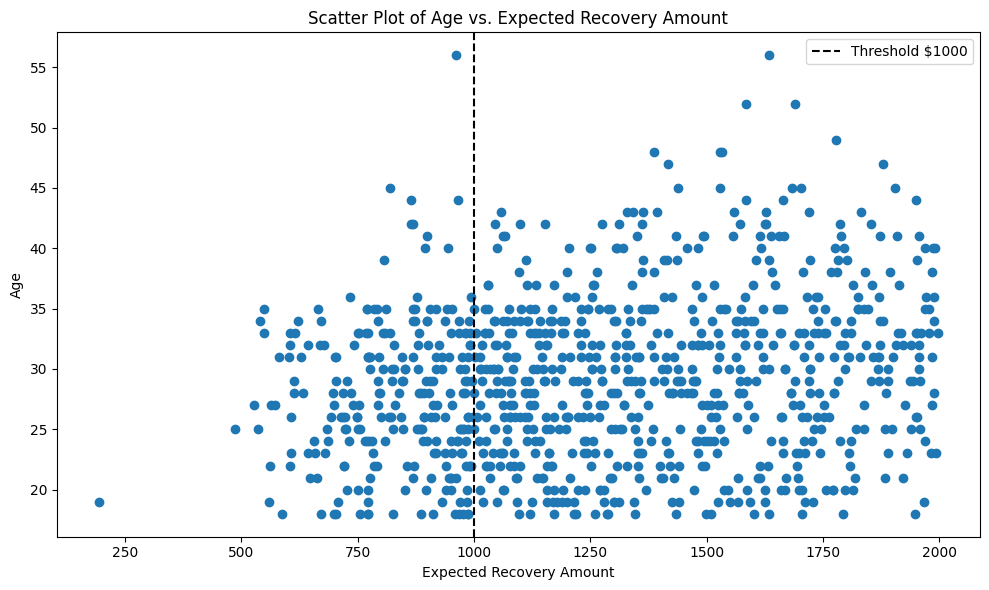

In [50]:
# Filter the DataFrame to include only data within the range $0 to $2000
filtered_df = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['expected_recovery_amount'], filtered_df['age'])
plt.axvline(x=1000, color='black', linestyle='--', label='Threshold $1000')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.legend()

plt.tight_layout()
plt.show()

**TRYING TO UNDERSTAND THE CORRELATION BETWEEN AGE AND EXPECTED RECOVERY AMOUNT in (900-1100)Range**

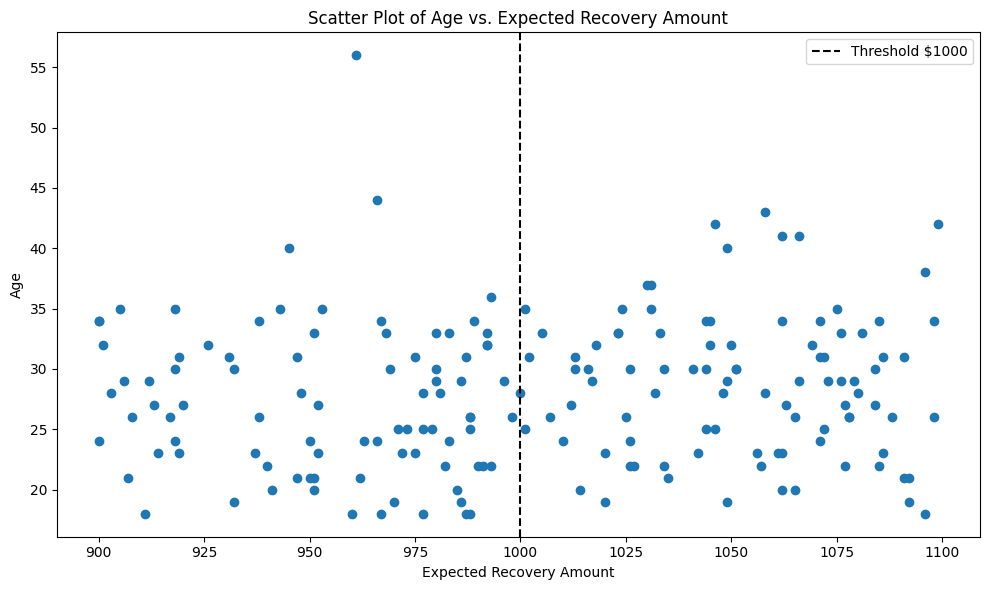

In [72]:
# Filter the DataFrame to include only data within the range 900 to 1100
filtered_df = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <1100)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['expected_recovery_amount'], filtered_df['age'])
plt.axvline(x=1000, color='black', linestyle='--', label='Threshold $1000')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.legend()

plt.tight_layout()
plt.show()

**STATISTICAL TEST FOR AGE VS EXPECTED RECOVERY AMOUNT**

In [76]:
# Compute average age just below and above the threshold
subset = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]
by_recovery_strategy = subset.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_age = subset.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = subset.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

**STATISTICAL TEST FOR SEX VS EXPECTED RECOVERY AMOUNT**

In [55]:
dataset_table= pd.crosstab(df.loc[(df['expected_recovery_amount']<2000) &
                              (df['expected_recovery_amount']>=0)]['recovery_strategy'],
                       df['sex'])
print(dataset_table)

sex                Female  Male
recovery_strategy              
Level 0 Recovery      108   139
Level 1 Recovery      316   354


In [56]:
val= stats.chi2_contingency(dataset_table)
val

Chi2ContingencyResult(statistic=0.7260545658263166, pvalue=0.3941650543686612, dof=1, expected_freq=array([[114.20719738, 132.79280262],
       [309.79280262, 360.20719738]]))

In [57]:
alpha= 0.05 
# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(dataset_table)
print(chi2)
print(p_value)

0.7260545658263166
0.3941650543686612


In [58]:
if p_value<= alpha:
    print('there is a relationship between the 2 variables')
else:
    print('there is no relationship between the 2 variables')

there is no relationship between the 2 variables


IT CAN BE SEEN THAT THERE IS NO RELATIONSHIP BETWEEN THE 2 NUMERICAL VARIABLES

**Graphical analysis:Recovery amount and Actual recovery amount**

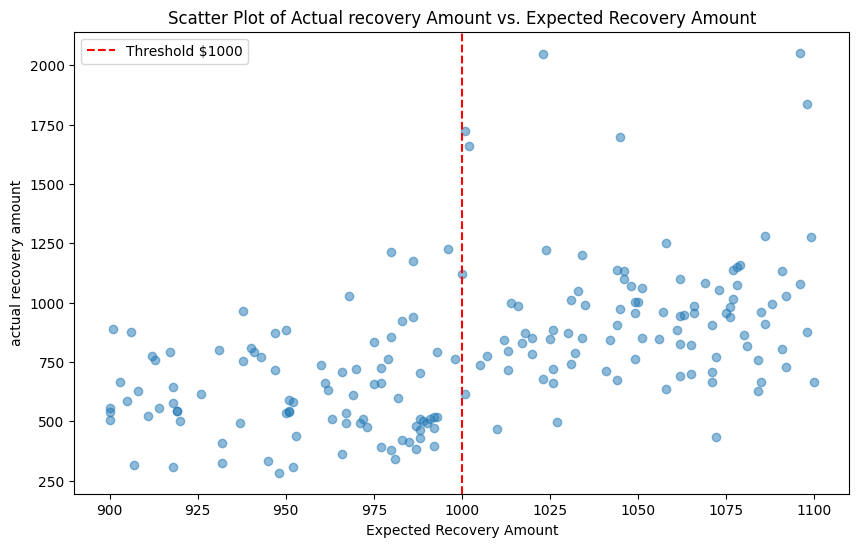

In [59]:

# Filter the DataFrame to include only data within the range $0 to $2000
filtered_df = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['expected_recovery_amount'], filtered_df['actual_recovery_amount'], alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold $1000')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('actual recovery amount')
plt.title('Scatter Plot of Actual recovery Amount vs. Expected Recovery Amount')
plt.legend()

# Show the plot
plt.show()

**STATISTICAL ANALYSIS USING KRUSKAL WALLIS TEST: Expected recovery amount and Actual recovery amount**

If the p-value associated with the Kruskal-Wallis test is less than your chosen significance level, you reject the null hypothesis and conclude that there are significant differences among the groups. If the p-value is greater, you fail to reject the null hypothesis.

In [66]:
# Perform Kruskal-Wallis test
Level_0_actual = subset.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = subset.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual, Level_1_actual))

# Repeat for a smaller range of $950 to $1050
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual)



KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)


KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

# REGRESSION MODELLING: NO THRESHOLD

In [61]:
subset= df.loc[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

X = subset['expected_recovery_amount']
y = subset['actual_recovery_amount']
X= sm.add_constant(X)

#LR MODEL 
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           3.65e-13
Time:                            12:06:16   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1918.4549    346.395     -5.538      0.000   -2601.920   -1234.989
expected_recovery_amount     2.6956      0.344      7.841      0.000       2.017       3.374
==============================================================================
Omnibus:                       64.512   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.639
Skew:                           1.457   Prob(JB):                     4.89e-41
Kurtosis:                       6.965   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adding true threshold

In [62]:
df['threshold'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
df1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

subset= df.loc[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

X = subset[['expected_recovery_amount','threshold']]
y = subset['actual_recovery_amount']
X= sm.add_constant(X)

#LR MODEL 
model = sm.OLS(y,X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           3.06e-15
Time:                            12:06:16   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       98.8272    622.659      0.159      0.874   -1129.777    1327.431
expected_recovery_amount     0.5430      0.651      0.834      0.406      -0.742       1.828
threshold                  284.0296     73.988      3.839      0.000     138.041     430.019
==============================================================================
Omnibus:                       66.386   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.158
Skew:                           1.512   Prob(JB):                     1.39e-41
Kurtosis:                       6.924   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# REGRESSION MODELLING: ADJUSTING THE THRESHOLD

In [63]:
subset = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]

# Define X and y
X = subset[['expected_recovery_amount','threshold']]
y = subset['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           1.12e-07
Time:                            12:06:16   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
threshold                  286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""